# The harmonic driven pendulum as a teaching example of integration of laboratory and computation 

### Example for paper

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [67]:
#Constants
m=1
g=9.81
L=1.05 #length of pendulum in meter
omegazero=np.sqrt(g/L) #natural frequency omegazero of the pendulum
PeriodofPendulum=2*np.pi/omegazero
print("Omega zero = %.2f rad/s"%omegazero)
print("Period of pendulum =%.2f s"%PeriodofPendulum)

Omega zero = 3.06 rad/s
Period of pendulum =2.06 s


## Estimation of motor frequency from video analysis

In [68]:
t1=1.532
t2=3.197
t3=4.895
periodo_motore=((t3-t2)+(t2-t1))/2
print("motor period ={:.2f} s".format(periodo_motore))
print("motor frequency= {:.2f}1/s".format(1/periodo_motore))
print("omega of motor = {:.2f} rad/s".format(2*np.pi*(1/periodo_motore)))


motor period =1.68 s
motor frequency= 0.591/s
omega of motor = 3.74 rad/s


In [69]:
#Import data from video analysis

#data_set_example1=np.loadtxt(r"C:\Users\....", skiprows=3)  # import .txt or .csv file
#build (t,y)
t_data=data_set_example1[:,0] # time
y_data=data_set_example1[:,2]  # the angle is in the third column

In [70]:
print(y_data)

[-0.01846578 -0.01849077 -0.01850748 ... -0.00844946 -0.00595667
 -0.00343587]


In [71]:
#Insert here omega and f0 from motor video analysis 

omega = 3.737   # omega of sinusoidal force
beta=0. #air damping
fzero=0.022 # from measure of displacement, to be estimated by Video analysis with Tracker# Fixed Parameters


# Comparison of numerical model solution and Tracker tracking data
### In the following example there is the plot of only the numerical solution, because we haven't upload the data file.

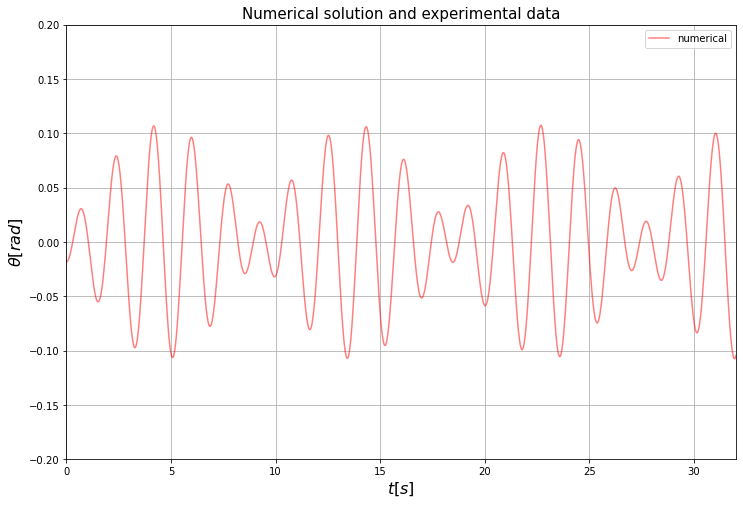

In [72]:
def F(y, t, parameters):
    """
    return derivatives for the second order differential equation
    """
    theta, thetadot = y
    beta, fzero, omega = parameters  
    dy=[0,0]  # create a list to store derivatives
    dy[0]=thetadot  # first derivative of y(t)
    dy[1]=-beta*thetadot - (omegazero**2)*np.sin(theta) + ((fzero/L)*omega**2) * np.cos(theta)*np.cos(omega * t) # second derivative
    return dy

# Provide the set of initial values and parameters
theta0 =-0.0184  # angle in radians
#.*np.pi/180
thetapunto0 =0 #from tracker
parameters = [beta, fzero, omega]
# initial conditions of y
y0 = [theta0, thetapunto0]

# Maximum time and dt interval 
tmax, dt = 32, 0.005  # dt is related to the frame rate in video 
t = np.arange(0, tmax+dt, dt)

# Call odeint method from scipy library
ysol = odeint(F, y0, t, args=(parameters,))
#$c_p$
#PLOT of the results
fig = plt.figure(figsize=(12, 8))
ax=plt.gca()
ax.plot(t, ysol[:, 0], linewidth=1.5, color='r', alpha=0.5,label='numerical')   # plot of (t,y(t)) as numerical solution of ODE
#ax.plot(t_data,y_data,linewidth=1.5, color='b', alpha=0.5, label='data from Tracker')  # here data points from Tracker
ax.set_title('Numerical solution and experimental data', fontsize=15)
ax.set_xlabel(r'$t[s]$',fontsize=16)
ax.set_ylabel(r'$\theta[rad]$',fontsize=16)
ax.set_xlim(0,tmax)
ax.set_ylim(-0.2, 0.2)
ax.legend()
plt.grid()
#plt.savefig("figxx.jpg")  #save the current figure
plt.show()

